# Mengenal Jenis-Jenis Visualisasi Data dan Tujuannya

Ada banyak sekali jenis visualisasi data, dari yang sederhana hingga yang kompleks. Setiap jenis visualisasi biasanya lebih tepat digunakan untuk suatu tujuan tertentu. Secara garis besar, ada empat tujuan visualisasi yang disampaikan oleh Andrew Abela sesuai gambar berikut.

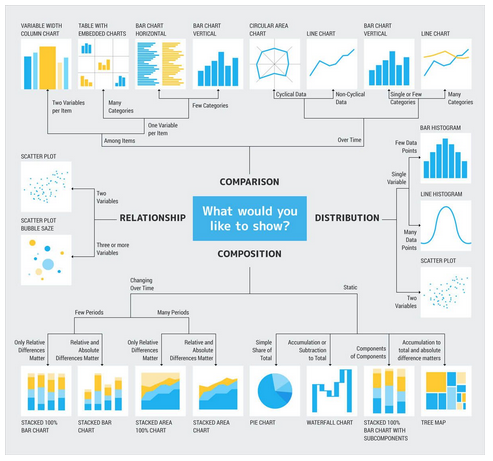

Berikut penjelasannya:

1. Perbandingan/Komparasi

Jika ingin membandingkan suatu sekumpulan nilai dengan nilai lainnya, ingin melihat mana yang lebih besar, mana yang lebih tinggi, mana yang naik, dsb. Untuk data yang terkait dengan waktu, visualisasi yang digunakan biasanya berupa line-chart. Sedangkan, jika yang dibandingkan adalah kategorikal, maka lebih cocok menggunakan bar-chart.

2. Distribusi

Bila ingin melihat distribusi/persebaran data di suatu variabel. Visualisasi yang lazim digunakan adalah histogram. Bisa melihat apakah datanya banyak terkumpul di nilai-nilai kecil, berat di kanan, atau simetris, ataupun berdistribusi normal. Untuk melihat distribusi di dua variabel, scatterplot juga bisa digunakan.

3. Komposisi

Digunakan untuk melihat komposisi dari suatu variabel, jika di-breakdown terhadap suatu dimensi data. Visualisasi yang biasa digunakan adalah stacked bar-chart untuk data kategorikal, atau stacked line-chart untuk data terkait waktu.

4. Keterhubungan/Relasi

Ketika ingin melihat keterhubungan antara suatu variabel dengan variabel lain. Misalnya ingin cek, jika variabel A semakin tinggi, apakah variabel B juga semakin tinggi, atau justru lebih rendah, atau tidak ada keterhubungannya. Visualisasi yang biasa digunakan untuk tujuan ini adalah scatter-plot.

# Membuat Multi-Line Chart

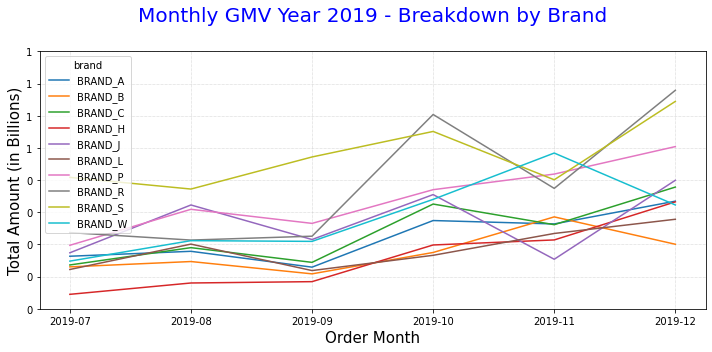

In [1]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month', 'brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

# Kustomisasi Legend

“Kalau saya lihat, kita punya komponen baru ya di sini, namanya legend. Berhubung brand-nya ada banyak, dan defaultnya di tengah makanya jadi menutupi grafiknya. Solusinya adalah kita pakai function khusus ya,” ujar Senja memberi masukan terhadap hasil kerjaku. Senangnya
Senja masih bersedia membantuku lagi.

 

Atur komponen legend menggunakan function plt.legend() seperti yang ditunjukkan oleh potongan kode berikut ini:

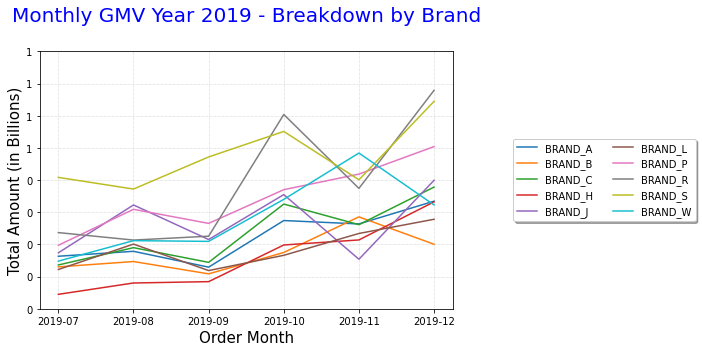

In [2]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

Beberapa parameter yang bisa ditambahkan untuk legend:

    1.loc: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan:
        1.1 'upper left', 'upper right', 'lower left', 'lower right':legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)
        1.2 'upper center', 'lower center', 'center left', 'center right': legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)
        1.3 'center': legend diletakkan di tengah-tengah axes
        1.4 'best': matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik
    2.bbox_to_anchor: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.
    3.shadow: jika diisi True, maka kotak legend akan memiliki bayangan.
    4.ncol: jumlah kolom dari isi legend, defaultnya adalah 1
    5.fontsize: ukuran huruf pada legend
    6.title: memberikan judul pada legend
    7.title_fontsize: ukuran huruf pada judul legend


# Kustomisasi Colormap

“Kalau sudah di breakdown by brand seperti ini terlihat ya trend sepanjang Oktober-Desember 2019 ini mirip semua. Jadi kemungkinan tidak ada faktor dari brand yang membuat GMV kita naik. Aksara, coba perlihatkan data breakdown by province,” perintah Senja sambil menunjuk layar laptopku.

Kalau tidak pernah dibimbing Senja sebelumnya, aku mungkin akan berpikir Senja tipe yang perfeksionis sekali. Tapi aku tahu ini sudah jadi kebiasaannya untuk lebih teliti. Caranya justru membuat hasil kerjaku lebih maksimal.



<Figure size 432x288 with 0 Axes>

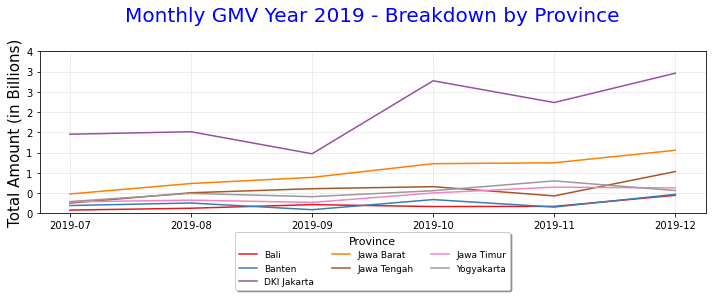

In [3]:
import matplotlib.pyplot as plt
plt.clf()
dataset.groupby(['order_month', 'province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Selain itu, perhatikan juga bahwa pada grafik tersebut, list warnanya berbeda, tidak default seperti pada brand. Itu karena di function plot() ditambahkan parameter cmap (yakni, color map) yang mendefinisikan sekelompok warna yang akan diberikan untuk tiap line. Di sini yang digunakan adalah ‘Set1’, yakni satu set warna yang biasa digunakan untuk warna yang diskrit. Untuk mengetahui jenis-jenis color map, bisa dilihat di halaman web berikut: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.

 

Dari grafik ini, terlihat ada beberapa provinsi yang mendominasi kenaikan GMV, seperti DKI Jakarta dan Jawa Barat. Tapi karena provinsinya banyak, yang bawah-bawah jadi kurang jelasnya. Bercampur semua begitu garisnya.

# Membuat Line Chart GMV Breakdown by Top Provinces

 “Oke, sudah terlihat cukup jelas jika kenaikan GMW disebabkan oleh provinsi. Berhubung kita fokusnya ke provinsi-provinsi yang GMV-nya besar, kalau begitu kita highlight untuk top 5 provinsi saja, yang lainnya kita gabungkan menjadi ‘other’,” ujar Senja menyimpulkan.

 

Aku berusaha membantu dengan segera mengecek lima provinsi dengan GMV tertinggi terlebih dulu:

In [4]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv', ascending=False)
                        .head(5))
print(top_provinces)

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


Setelah itu, membuat kolom baru, misalnya ‘province_top’. Seperti sebelumnya, manfaatkan function apply & lambda.

In [5]:
# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')


Kemudian, setelah memiliki kolom baru, grafiknya bisa di update. Sebagai catatan, untuk mengubah ukuran figure, juga bisa menggunakan function plt.gcf().set_size_inches yang diletakkan di akhir code, sebelum plt.show(). 

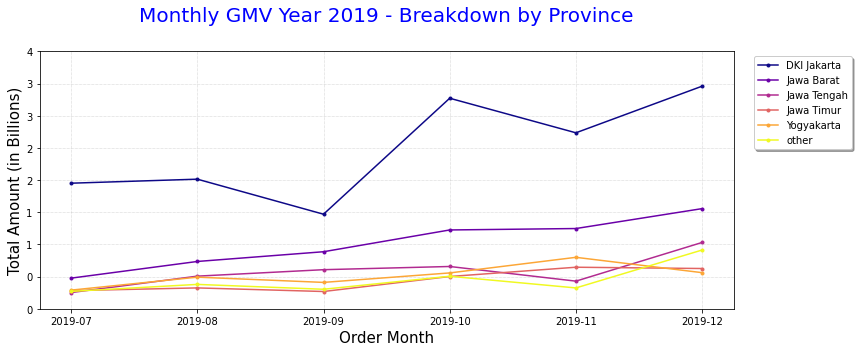

In [6]:
# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

# Membuat Anotasi

Setelah mengutak-atik anotasi, aku sedikit bingung. “Nja, ini gimana ya?” tanyaku akhirnya. Senja yang sedang duduk di sebelahku memerhatikan kodeku.

“Begini, Aksara. Anotasi itu mirip seperti teks, hanya saja ada suatu titik tertentu yang kita tunjuk untuk diberikan informasi tambahan. Selain itu, kita bisa menambahkan panah melalui anotasi,” jelas Senja sambil mengambil buku catatan dan menulis di sana.

 

Aku diam memerhatikan:

Untuk membuat annotate, gunakan function  plt.annotate. Parameter pertama adalah isi teksnya, dan parameter kedua adalah koordinat dari point yang dianotasi.

Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:

    1.xytext: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)
    2.arrowprops:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:
        2.1 arrowstyle: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.
        2.2 connectionstyle: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.
        2.3 color: menentukan warna dari panah


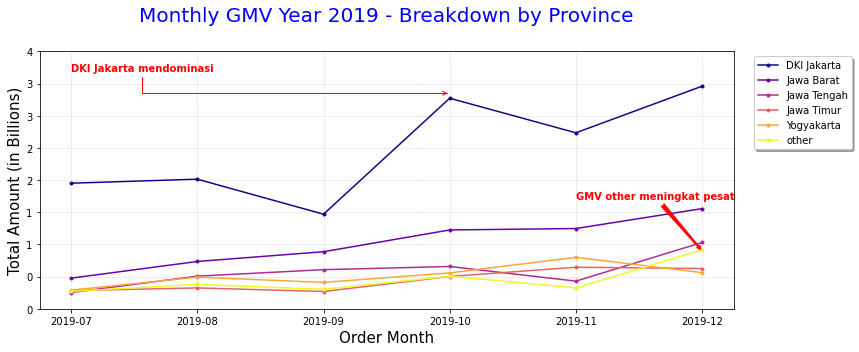

In [7]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
             xytext=(4, 1700000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='fancy',
							 connectionstyle="arc3",
							 color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
			 xytext=(0, 3700000000), weight='bold', color='red',
			 arrowprops=dict(arrowstyle='->',
							 connectionstyle="angle",
							 color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

# Membuat Subset Data

“Sudah aku sampaikan ke kepala cabang. Ini insight yang menarik menurut beliau. Ada rikues kalau provinsi ‘other’ ini, kita analisis lagi di lain waktu saja dan fokuskan untuk analisis behavior transaksi di DKI Jakarta pada bulan Oktober-Desember 2019 ini, karena trend-nya mirip dengan overall GMV. Kita fokuskan ke sana ya,” pinta Senja.

“Oke, aku coba cek dulu perbandingan GMV di kota-kota di DKI Jakarta itu seperti apa,” sahutku segera beraksi.

“Iya, berhubung kita mau fokus ke provinsi DKI Jakarta dan bulan Oktober-Desember 2019, kita filter saja datanya dan disimpan ke dataframe baru", tukas Senja sembari membantu mengarahkan kursorku untuk memberikan contoh menggunakan data frame dataset_dki_q4.

In [8]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv province_top  
0  BRAND_J        10      740000     2019-10  7400000  DKI Jakarta  
1  BRAND_R         2      604000     2019-10  1208000  DKI Jakarta  
2  BRAND_C         8     1045000     2019-11  8360000  DKI Jakarta  
4  BRAND_R         2     4475000     2019-10  8950000  DKI Jakarta  
6  BRAND_C         1     1465000     2019-11  1465000  DKI Jakarta  


# Membuat Pie Chart

“Ini nanti dibuat pie chartnya juga ya, Aksara. Aku jelaskan sebentar caranya.  Kita perlu membuat dulu dataframe agregat,.” Aku selalu suka mendengar penjelasan Senja karena ia selalu berusaha memaparkan langkah per langkah. Berikut cara yang dipaparkan Senja padaku:

 

Misalnya  gmv_per_city_dki_q4,  masukkan datanya ke function plt.pie().

Beberapa parameter yang bisa dimodifikasi:

    1.labels: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.
    2.colors: array yang berisikan warna untuk masing-masing bagian pie.
    3.autopct: format untuk nilai persentasi yang ditampilkan, bisa berupa string atau function.
    4.shadow: jika diisi True, maka ada bayangan untuk pie chart-nya. Defaultnya adalah False.
    5.radius: jari-jari dari pie-chart

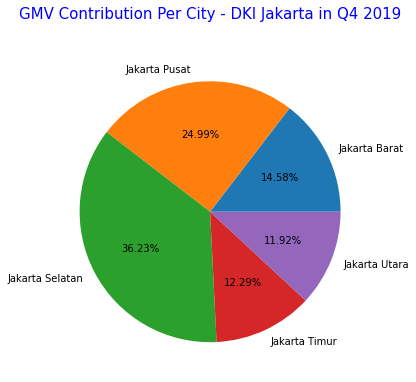

In [9]:
import matplotlib.pyplot as plt
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels=gmv_per_city_dki_q4['city'], autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

# Membuat Bar Chart

“Selain menggunakan pie chart, kita bisa pakai bar chart, tidak Nja?”

Kulihat matanya berbinar mendengar pertanyaanku. Senja mengangguk cepat dan menjawab, “Alternatif lain untuk membandingkan GMV tiap kota adalah dengan barchart. Saya lebih menyukai visualisasi ini karena lebih mudah terlihat perbandingan antar kota.”

 

Syntax dalam praktik membuat bar chart mirip dengan line chart, tentukan nilai untuk sumbu-x dan sumbu-y, lalu tambahkan parameter kind='bar' seperti berikut ini:

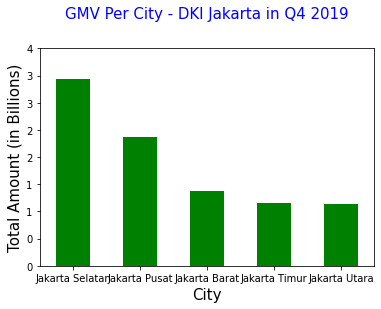

In [10]:
import matplotlib.pyplot as plt
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

Perhatikan di sini juga ditambahkan parameter rotation di plt.xtick() untuk memutar label di sumbu-x.

Sebagai catatan, jika ingin barchart-nya horizontal, maka bisa mengganti parameternya menjadi kind='barh', dengan tentu saja tidak lupa juga harus menyesuaikan sumbu x dan y nya.

# Membuat Multi-Bar Chart

“Aksara, dari grafik ini, kelihatannya Jakarta Selatan dan Jakarta Pusat lumayan mendominasi GMV. Tapi apakah ini konsisten di setiap bulan? Bisa tolong tampilkan?”

“Bisa, Nja. Bentar yah, ini aku buatkan dulu multi-barchart untuk analisisnya,” ujarku.

Ini kode yang kutuliskan untuk membuat multi-barchart:

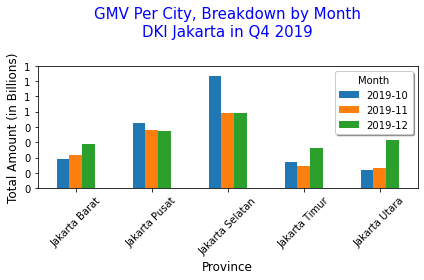

In [11]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Membuat Stacked Chart

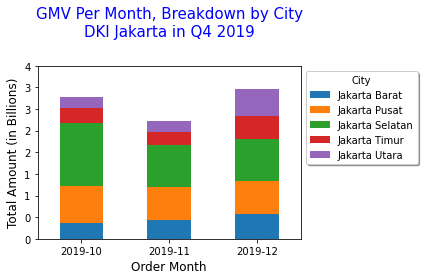

In [12]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['order_month', 'city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

"Dari kedua chart tersebut, kita sama-sama bisa melihat pola bahwa kebanyakan GMV turun dari bulan Oktober ke November, tetapi lalu naik pesat di bulan Desember. Untuk di Jakarta Barat, GMV November justru naik dari Oktober. Sedangkan di Jakarta Selatan, GMV Desember justru lebih kecil daripada GMV Oktober", jelasku. 

"Hmm, padahal Jakarta Selatan adalah penyumbang GMV paling besar ya. Berarti kita harus menyarankan tim bisnis untuk genjot lagi penjualan di sana, agar trend-nya naik kembali, seperti kota-kota lainnya. Akan saya bawa kembali hasil temuan kamu ini ke Andra dan kepala cabang. Terima kasih, Aksara.”

 

# Membuat Agregat Data Customer

“Oke, data ini sudah bisa jadi dasar bagi kami untuk membuat kampanye yang meningkatkan transaksi. Kalau dilihat, ini di Jakarta Barat potensinya lagi baik ya. Tiap bulan growth-nya positif,” ujar seorang bapak dari video call di ponsel Senja.

Dari Senja, kuketahui kalau beliau adalah kepala cabang A yang menerima hasil dataku kemarin.

“Bagaimana dengan customer kita di DKI Jakarta? Apakah ada pola-pola menarik, terutama di Q4 2019?” tanya beliau kembali.

 

“Untuk itu, coba kita lihat dulu summary untuk tiap customer kita ya, Pak,” sahut Senja sembari memberi intruksi padaku.

Aku pun membuat dataframe baru bernama data_per_customer_dki_q4.

In [13]:
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders', ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


Di sini menggunakan function agg untuk melakukan agregasi data. Data agregat per customer yang diambil yaitu jumlah orders (banyaknya unique order_id), total quantity, dan total GMV.

Lalu didapatkan 711 customers yang bertransaksi di DKI Jakarta pada Q4 2020.

Jika diurutkan dari jumlah order terbanyak, bisa dilihat bahwa customer_id 12748 telah melakukan 29 transaksi dengan jumlah quantity mencapai 557, dan GMV lebih dari 175 Juta! Luar biasa ya. Customer-customer seperti ini harus tetap dijaga agar semakin loyal dengan produk. 

# Membuat Histogram - Part 1

“Dari dataframe baru ini kita bisa melihat persebaran datanya sekaligus untuk masing-masing variabel. Jadi, pakai histogram bukan?” tanyaku.

“Iya, langsung dikerjakan saja, Aksara.”

 

Aku pun menggunakan function plt.hist dan memasukkan variabel yang ingin dicek. Parameter lain yang bisa ditambahkan yaitu:

    bins: jumlah bin (kelompok nilai) yang diinginkan
    range: nilai minimum dan maksimum yang ditampilkan
    orientation: ‘horizontal’ atau ‘vertikal’
    color: warna bar di histogram


<Figure size 432x288 with 0 Axes>

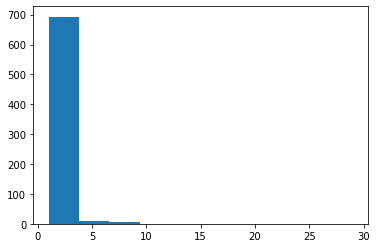

In [14]:
import matplotlib.pyplot as plt
plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()

tampilan plot untuk histogram kedua

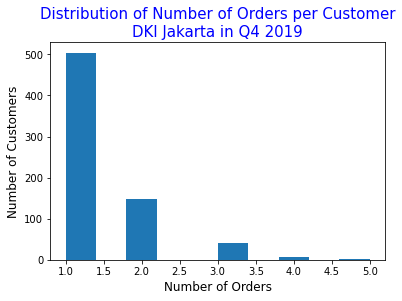

In [15]:
# Histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1, 5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

# Membuat Histogram - Part 2

Kalau seperti ini, aku bisa membuat histogram untuk quantity juga.

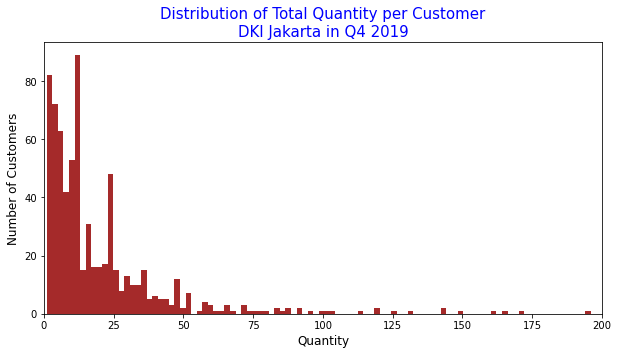

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1, 200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200)
plt.show()

# Membuat Histogram - Part 3

“Aksara, kalau untuk GMV, agak berbeda. Kamu paham maksud saya?” ujar Senja mengingatkan.

Aku mengangguk. Aku harus menormalisasi ticks label di sumbu-x karena angka yang menunjukkan GMV bisa jadi terlalu panjang. Aku menunjukkanya pada Senja:



In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1, 200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15,color='blue')
plt.xlabel('GMV (in Millions)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

# Membuat Scatterplot

“Aksara, ini udah bagus penyajiannya. Tapi apakah variabel tersebut bisa saling berkorelasi?” tanya Senja menyadarkanku. Aku pun segera melihatnya dengan scatterplot.

 

Untuk membuat scatterplot, aku perlu menggunakan function plt.scatter dengan memasukkan variabel-variabel yang akan dibuat scatterplot.

Contoh untuk melihat scatterplot quantity vs GMV:

<Figure size 432x288 with 0 Axes>

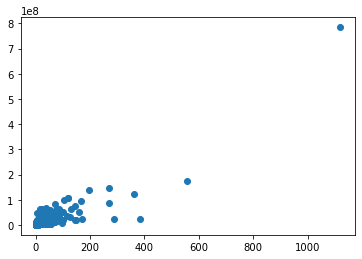

In [17]:
import matplotlib.pyplot as plt
plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

Terlihat bahwa memang semakin besar quantity-nya, GMV cenderung semakin tinggi. Tapi masalahnya datanya banyak terkumpul di nilai-nilai kecil, sehingga tidak begitu terlihat detailnya di area situ.

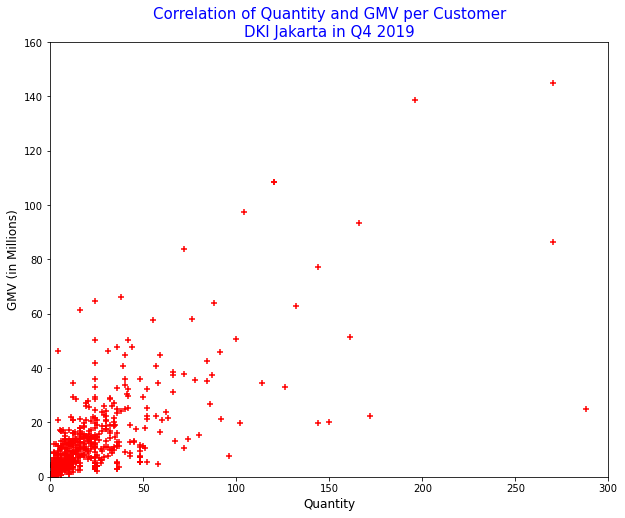

In [18]:
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10, 8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

Di sini semakin jelas bahwa quantity dan GMV itu berkorelasi positif. Jadi jika suatu customer telah membeli dengan banyak quantity, maka kemungkinan GMV dari dia juga semakin besar.

# Case 1: Menentukan brand top 5

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

 

Case 1:

Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.

In [19]:
#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


# Case 2: Multi-line chart daily quantity untuk brand top 5

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

 

Case 2:

Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1 tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain). Beri anotasi untuk titik lonjakan tersebut.

Jika berhasil dijalankan maka akan muncul multi-line chart seperti berikut ini:

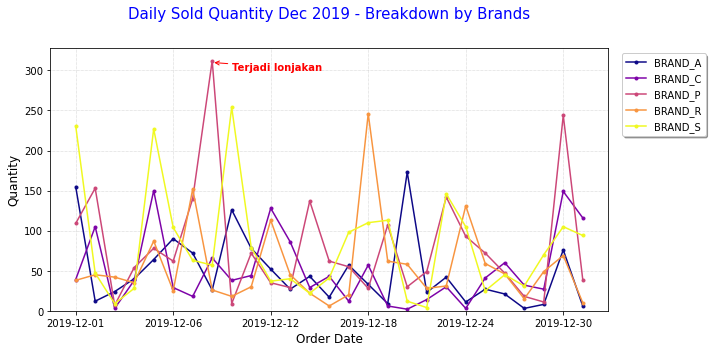

In [20]:
import matplotlib.pyplot as plt
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

# Case 3: Kuantitas penjualan brand top 5 selama Desember 2019

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

 

Case 3:

Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.

Jika berhasil dijalankan akan menghasilkan grafik seperti berikut ini:

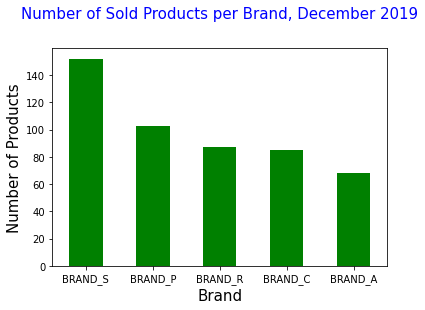

In [21]:
import matplotlib.pyplot as plt
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

# Case 4: Penjulan produk diatas 100 dan dibawah 100 selama Desember 2019

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

 

Case 4:

Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di bulan Desember 2019. Apakah ada pola yang menarik?

Case 3: Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.

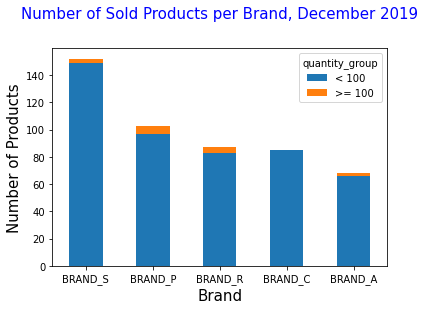

In [22]:
import matplotlib.pyplot as plt
#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

# Case 5: Murah atau mahalkah harga produk brand top 5

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

 

Case 5:

Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah atau yang mahal?

Jika berhasil dijalankan maka akan dihasilkan grafik seprti yang ditunjukkan di bawah ini

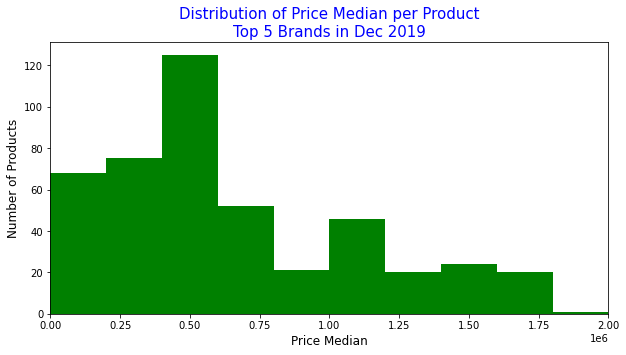

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

# Case 6a: Korelasi quantity vs GMV

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

 

Case 6a:

Untuk setiap product_id, cek scatterplot antara  quantity dan GMV, apakah ada korelasi? Bagaimana dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

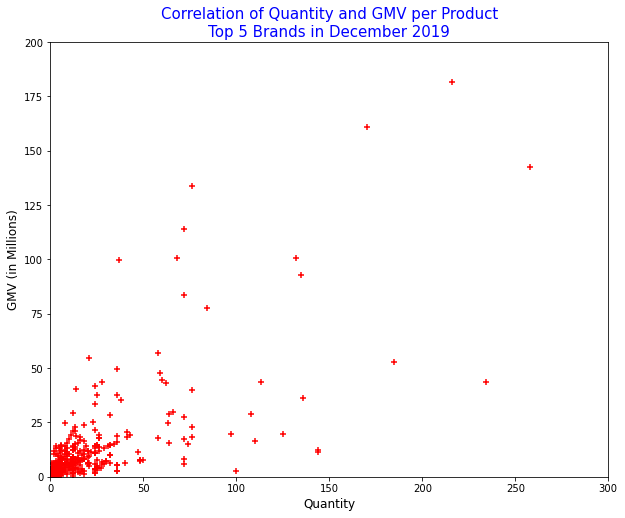

In [24]:
import matplotlib.pyplot as plt
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

# Case 6b: Korelasi median harga vs quantity

Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silakan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight tambahan.

 

Case 6b:

Untuk setiap product_id, cek scatterplot antara  quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case 6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

<Figure size 432x288 with 0 Axes>

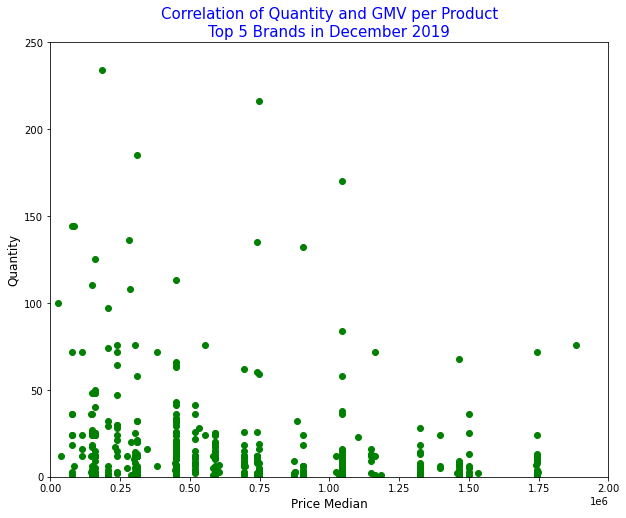

In [25]:
import matplotlib.pyplot as plt
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()
